              Open    High     Low   Close    Volume
Date                                                
2017-07-07  142.90  144.75  142.90  144.18  19201712
2017-07-06  143.02  143.50  142.41  142.73  24128782
147.8313636363636
------------------------------------------------------------
DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)
              Open    High     Low   Close    Volume
Date                                                
2017-01-31  121.15  121.39  120.62  121.35  49200993
2017-01-30  120.93  121.63  120.66  121.63  30377503
2017-01-27  122.14  122.35  121.6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Indexing a DataFrame 

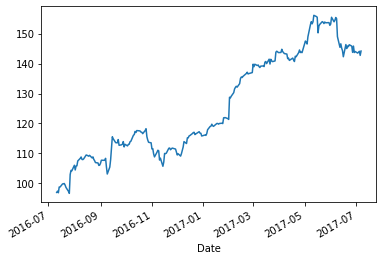

In [13]:
#1.	DatetimeIndex and Resample
import pandas as pd
df = pd.read_csv("aapl.csv",parse_dates=["Date"], index_col="Date")
print(df.head(2))
print(df['2017-06'].Close.mean())
print("------------------------------------------------------------")
print(df.index)
print(df["2017-01"])

print("------------------------------------------------------------")
print(df['2017-06'].head())
print("------------------------------------------------------------")
print(df['2017-06'].Close.mean())
print("------------------------------------------------------------")
print(df['2017'].head(2))
print("------------------------------------------------------------")
print(df['2017-01-08':'2017-01-03'])
print("------------------------------------------------------------")
print(df['2017-01'])
print("------------------------------------------------------------")
print(df['Close'].resample('M').mean().head())		# M : month end frequency
print("------------------------------------------------------------")
print(df['2016-07'])
print("------------------------------------------------------------")
%matplotlib inline
print(df['Close'].plot())

# using Close.mean()
print("------------------------------------------------------------")
print(df['2017-06'].mean())



     Open    High     Low   Close    Volume
0  153.17  153.33  152.22  153.18  16404088
1  153.58  155.45  152.89  155.45  27770715
2  154.34  154.45  153.46  153.93  25331662
3  153.90  155.81  153.78  154.45  26624926
4  155.02  155.98  154.48  155.37  21069647
DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='B')
              Open    High     Low   Close    Volume
2016-06-01  153.17  153.33  152.22  153.18  16404088
2016-06-02  153.58  155.45  152.89  155.45  27770715
2016-06-03  154.34  154.45  153.46  153.93  25331662
2016-06-06  153.90  155.81  153.78  154.45  26624926
2016-06-07  155.02  155.

2011-01-01 00:00:00    6
2011-01-01 01:00:00    8
2011-01-01 02:00:00    5
2011-01-01 03:00:00    7
2011-01-01 04:00:00    2
2011-01-01 05:00:00    3
2011-01-01 06:00:00    4
2011-01-01 07:00:00    5
2011-01-01 08:00:00    4
2011-01-01 09:00:00    3
2011-01-01 10:00:00    9
2011-01-01 11:00:00    8
2011-01-01 12:00:00    0
2011-01-01 13:00:00    1
2011-01-01 14:00:00    0
2011-01-01 15:00:00    9
2011-01-01 16:00:00    6
2011-01-01 17:00:00    5
2011-01-01 18:00:00    9
2011-01-01 19:00:00    4
Freq: H, dtype: int64

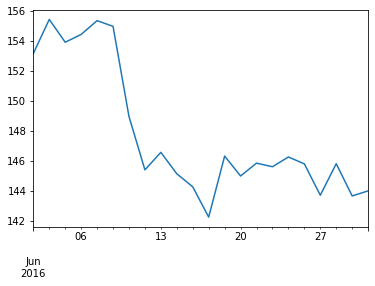

In [27]:
#2.	Date range
import pandas as pd
df = pd.read_csv("aapl_no_dates.csv") # compare with aapl_2.csv
print(df.head())

rng = pd.date_range(start="6/1/2016",end="6/30/2016",freq='B') 	
# B: business day
print(rng)

df.set_index(rng, inplace=True)	# inplace =  true: create a new dataframe
print(df.head(8))


daily_index = pd.date_range(start="6/1/2016",end="6/30/2016",freq='D')
 # D: calendar day
print(daily_index)

print(daily_index.difference(df.index))

%matplotlib inline
print(df.Close.plot())

print(df["2016-06-01":"2016-06-10"].Close.mean())

print(df.index)

df.asfreq('D',method='pad')	# asfreq: Convert TimeSeries to specified frequency.

df.asfreq('W',method='pad')
# method='pad': Method to use for filling holes in reindexed Series

df.asfreq('H',method='pad')

rng = pd.date_range('1/1/2011', periods=72, freq='H')
print(rng)

import numpy as np
ts = pd.Series(np.random.randint(0,10,len(rng)), index=rng)
# np.random.randint(0,10,len(rng): from 0 to 10, the number of len(rng)
ts.head(20)





In [28]:
#3.	Holidays
import pandas as pd
df = pd.read_csv("aapl_no_dates_2.csv") # compare with aapl_3.csv
print(df.head())
rng = pd.date_range(start="7/1/2017", end="7/21/2017", freq='B')
print(rng)

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

rng = pd.date_range(start="7/1/2017",end="7/23/2017", freq=us_cal)
print(rng)

df.set_index(rng,inplace=True) 
print(df.head())

from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday
class myCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('My Birth Day', month=4, day=15),#, observance=nearest_workday),
    ]
my_bday = CustomBusinessDay(calendar=myCalendar())
pd.date_range('4/1/2017','4/30/2017',freq=my_bday)

egypt_weekdays = "Sun Mon Tue Wed Thu"
b = CustomBusinessDay(weekmask=egypt_weekdays)
pd.date_range(start="7/1/2017",periods=20,freq=b)

b = CustomBusinessDay(holidays=['2017-07-04', '2017-07-10'], weekmask=egypt_weekdays)
pd.date_range(start="7/1/2017",periods=20,freq=b)


     Open    High     Low   Close    Volume
0  144.88  145.30  143.10  143.50  14277848
1  143.69  144.79  142.72  144.09  21569557
2  143.02  143.50  142.41  142.73  24128782
3  142.90  144.75  142.90  144.18  19201712
4  144.11  145.95  143.37  145.06  21090636
DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='B')
DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='C')
              Open    High     Low   Close    Volume
2017-07-03  144.88  145.30  143.10  143.50  14277848
2017-0

DatetimeIndex(['2017-07-02', '2017-07-03', '2017-07-05', '2017-07-06',
               '2017-07-09', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-16', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-23', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27', '2017-07-30', '2017-07-31'],
              dtype='datetime64[ns]', freq='C')

In [16]:
#4.	to_datetime: process different date format 
import pandas as pd
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dates)

dt = ['2017-01-05 2:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2016', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dt)

pd.to_datetime('30-12-2016')

pd.to_datetime('5-1-2016', dayfirst=True)

pd.to_datetime('2017$01$05', format='%Y$%m$%d')
#	$: delimiter;	format: yy-mm-dd

pd.to_datetime('2017#01#05', format='%Y#%m#%d')
#	#: delimiter;	format: yy-mm-dd

pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='ignore')
#	'abc' : intentional error

pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='coerce')

# Epoch or Unix time means number of seconds that have passed since Jan 1, 1970 00:00:00 UTC time
# epoch converter: 	https://www.epochconverter.com/
current_epoch = 1594833926
pd.to_datetime(current_epoch, unit='s')

pd.to_datetime(current_epoch*1000, unit='ms')

t = pd.to_datetime([current_epoch], unit='s') 
t

t.view('int64')


array([1594833926000000000])

In [17]:
#5.	Period and PeriodIndex
import pandas as pd
y = pd.Period('2016')
y		# A-DEC: 	A: annual 

y.start_time

y.end_time
y.is_leap_year

m = pd.Period('2017-12')
m

m.start_time


m.end_time


m+1


d = pd.Period('2016-02-28', freq='D') 
d

d.start_time

d.end_time

d+1

h = pd.Period('2017-08-15 23:00:00',freq='H')
h

h+1

h+pd.offsets.Hour(1)	# Achieve same results using pandas offsets hour

q1= pd.Period('2017Q1', freq='Q-JAN')	# Q: quarter
q1


q1.start_time

q1.end_time
q1.asfreq('M',how='start')


q1.asfreq('M',how='end')


w = pd.Period('2017-07-05',freq='W')  # w: week
w

w-1

w2 = pd.Period('2017-08-15',freq='W')
w2

w2-w

r = pd.period_range('2011', '2017', freq='q')
r

r[0].start_time

r[0].end_time

r = pd.period_range('2011', '2017', freq='q-jan')
r

r[0].start_time

r[0].end_time

import numpy as np
idx = r
ps = pd.Series(np.random.randn(len(idx)), idx)   # idx: Error
ps

ps['2016']


ps['2016':'2017']

pst = ps.to_timestamp()
pst

pst.index

ps = pst.to_period()
ps


ps.index


import pandas as pd 
df = pd.read_csv("wmt.csv") 
df

df.set_index("Line Item",inplace=True)
df = df.T		# T: transpose
df

df.index = pd.PeriodIndex(df.index, freq="Q-JAN")
# Change object to "Q-JAN"
df

df.index


df.index[0].start_time

df["Start Date"]=df.index.map(lambda x: x.start_time)
df

df["End Date"]=df.index.map(lambda x: x.end_time)
df


Line Item,Revenue,Expenses,Profit,Start Date,End Date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


In [18]:
#6.	Timezone Handling
import pandas as pd
df = pd.read_csv("msft.csv", header=1,index_col='Date Time',parse_dates=True)   # header = 1: infer 2nd line 
df


df.index

df.tz_localize(tz='US/Eastern')
df


df.index = df.index.tz_localize(tz='US/Eastern')
df.index


df = df.tz_convert('Europe/Berlin')
df


df.index


DatetimeIndex(['2017-08-17 15:00:00+02:00', '2017-08-17 15:15:00+02:00',
               '2017-08-17 15:30:00+02:00', '2017-08-17 16:00:00+02:00',
               '2017-08-17 16:30:00+02:00', '2017-08-17 17:00:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', name='Date Time', freq=None)

In [19]:
#7.	Timezone Handling
import pandas as pd
df = pd.read_csv("fb.csv",parse_dates=['Date'],index_col='Date')
df


df.shift(1)

df.shift(-1)


df['Prev Day Price'] = df['Price'].shift(1) 
df

df['Price Change'] = df['Price'] - df['Prev Day Price']
df


df['5 day return'] =  (df['Price'] - df['Price'].shift(5))*100/df['Price'].shift(5)
df

df = df[['Price']]
df

df.index

df.index = pd.date_range(start='2017-08-15',periods=10, freq='B')
df

df.index

# Shift the time index, using the index’s frequency if available.
df.tshift(1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.


,Price
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74
2017-08-28,166.32
2017-08-29,167.24
